In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams
from warnings import warn
import datetime as dt
from scipy import interpolate
import matplotlib as mpl
import os.path
import itertools
import os.path

# path and file name of crops info
era5_data = xr.open_dataset('/net/ostro/ML_work_DC/era5_dry_wet/wet_in_dry_era5.nc')

#selecting wet and dry datasets
##data_dry = era5_data.where(era5_data.im_type.values==1)
#data_wet = era5_data.where(era5_data.im_type.values==0)
era5_data

<xarray.Dataset>
Dimensions:   (n_crops: 3106, levels: 37)
Coordinates:
  * n_crops   (n_crops) int64 0 1 2 3 4 5 6 ... 3100 3101 3102 3103 3104 3105
  * levels    (levels) int32 1000 975 950 925 900 875 850 ... 20 10 7 5 3 2 1
Data variables: (12/30)
    im_names  (n_crops) object ...
    SST       (n_crops) float64 ...
    SST_std   (n_crops) float64 ...
    TCWV      (n_crops) float64 ...
    TCWV_std  (n_crops) float64 ...
    TCC       (n_crops) float64 ...
    ...        ...
    rh_std    (n_crops, levels) float64 ...
    rh        (n_crops, levels) float64 ...
    clwc_std  (n_crops, levels) float64 ...
    clwc      (n_crops, levels) float64 ...
    cc_std    (n_crops, levels) float64 ...
    cc        (n_crops, levels) float64 ...
Attributes: (12/19)
    CREATED_BY:        Claudia Acquistapace
    CREATED_ON:        2023-02-03 14:57:39.348935
    FILL_VALUE:        NaN
    PI_NAME:           Claudia Acquistapace
    PI_AFFILIATION:    University of Cologne (UNI), Germany
    PI_ADDRESS:        Institute for geophysics and meteorology, Pohligstrass...
    ...                ...
    COMMENT:           
    Conventions:       CF-1.8
    title:             ERA5 variables for all the crops of the selected satel...
    institution:       University of Cologne (UNI), Germany
    history:           source: ERA5\nprocessing: https://github.com/ClauCloud...
    featureType:       satellite-era5

In [3]:
path_DC_work = '/net/ostro/ML_work_DC/'
intrusion_info = pd.read_csv(path_DC_work+'intrusion1_embedding_space.csv')
wet_dry_info = intrusion_info.to_xarray() 

# setting output path for plots
path_out = '/net/ostro/ML_work_DC/era5_dry_wet/vars_histograms/'

In [4]:
# selecting types based on the variable im_type
ind_wet = np.where(era5_data.im_type.values == 0)[0]
ind_dry = np.where(era5_data.im_type.values == 1)[0]
print(ind_wet, ind_dry)

# creating 2 separated datasets
dry_data = era5_data.isel(n_crops=ind_dry)
wet_data = era5_data.isel(n_crops=ind_wet)


[   6    7    8    9   10   11   12   13   14   15   16   17   18   19
   20   21   22   23   24   25   26   27   28   29   30   31   32   33
   34   35   36   37   38   39   40   41   42   43   44   45   46   47
   48   49   50   51   52   53   54   55   56   57   58   59   60   61
   62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   87   88   89
   90   91   92   93   94   95   96   97   98   99  100  101  102  103
  104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  583  584  585  586  587
  588  589  590  591  592  593  594  595  596  597  598  599  600  601
  602  603  604  605  606  607  608  609  610  611  612  613 1062 1063
 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077
 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091
 1092 1093 1094 1095 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880
 2881 

In [5]:
era5_data.q.units

'kg kg**-1'

2706 400
2706 400
2706 400
2706 400
2706 400
2706 400


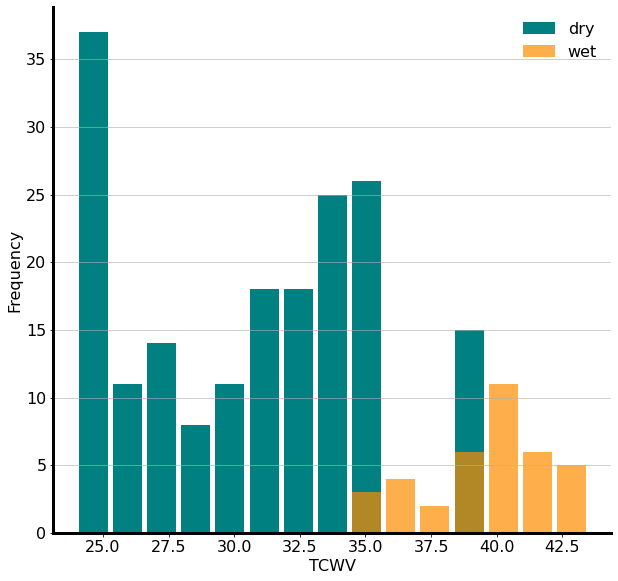

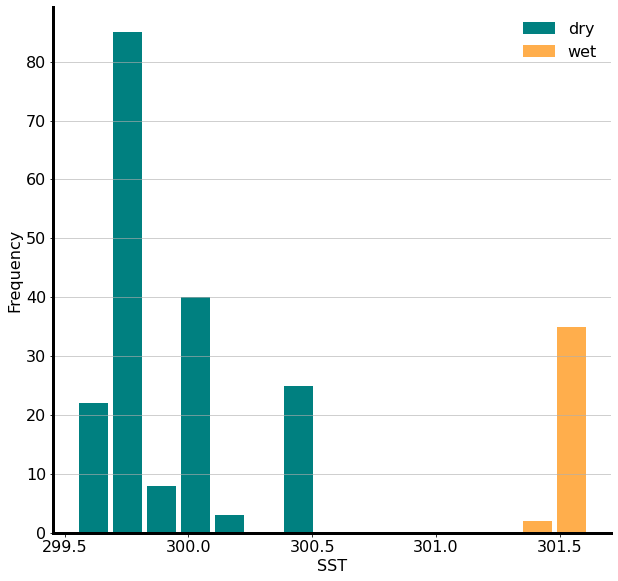

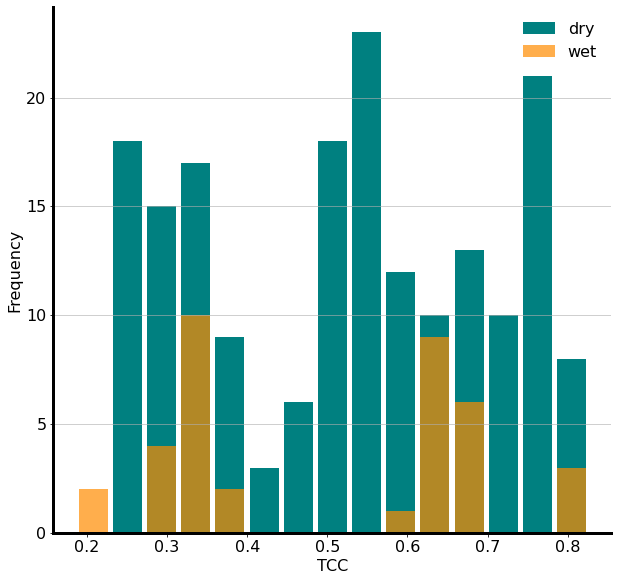

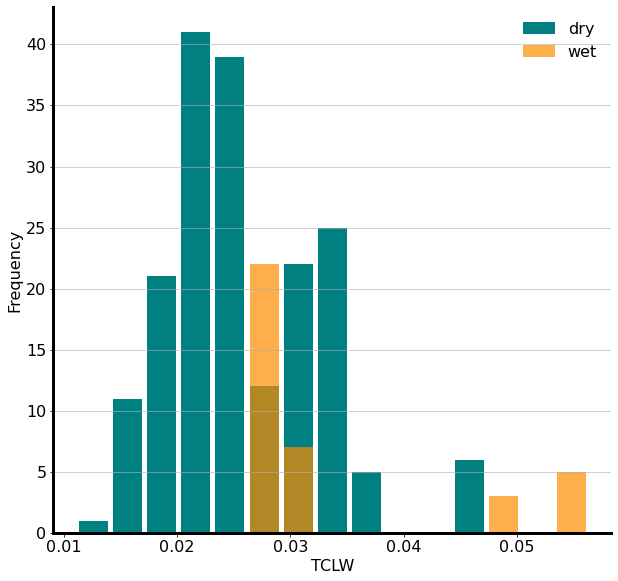

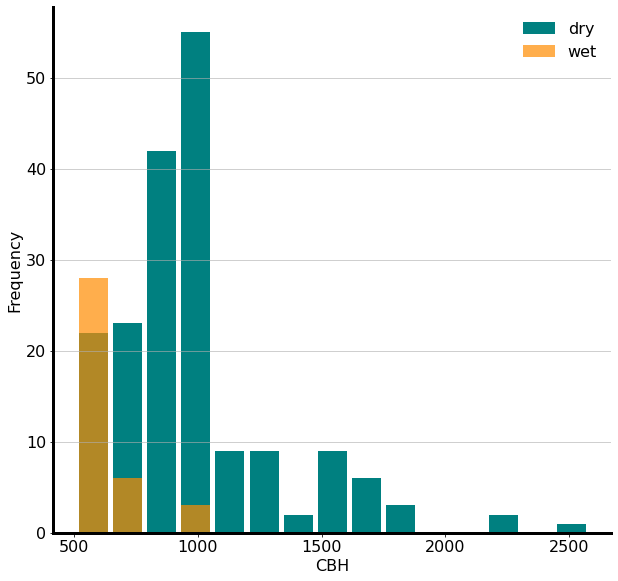

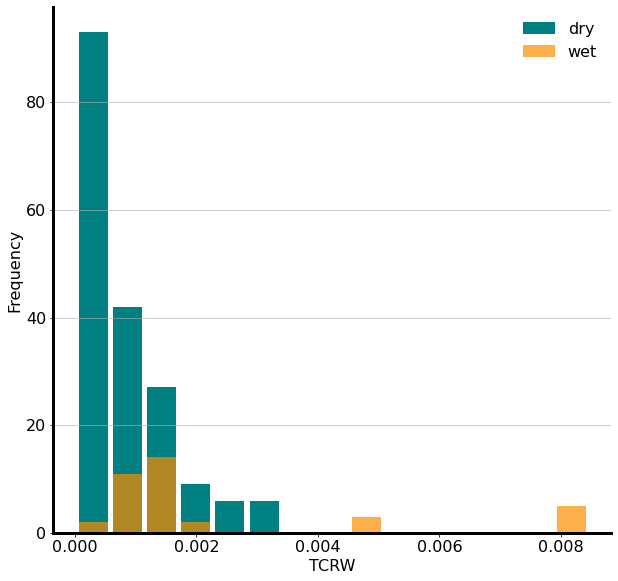

In [10]:
def f_plot_var_histogram_dry_wet(dry_data, wet_data, era5_data, var_name, path_out):


    # plot quicklook of filtered and corrected mdv for checking
    labelsizeaxes   = 14
    fontSizeTitle   = 16
    fontSizeX       = 16
    fontSizeY       = 16
    cbarAspect      = 10
    fontSizeCbar    = 16
    rcParams['font.sans-serif'] = ['Tahoma']
    matplotlib.rcParams['savefig.dpi'] = 100
    plt.rcParams.update({'font.size':16})

    var_dry = dry_data[var_name].values
    var_wet = wet_data[var_name].values
    print(len(var_dry), len(var_wet))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    matplotlib.rcParams['savefig.dpi'] = 100
    plt.gcf().subplots_adjust(bottom=0.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(3)
    ax.spines["left"].set_linewidth(3)
    # An "interface" to matplotlib.axes.Axes.hist() method
    n_d, bins_d, patches_d = ax.hist(x=var_dry, bins=15, range=[np.nanmin(era5_data[var_name].values), \
                                                                np.nanmax(era5_data[var_name].values)], \
                                     color='teal', alpha=1, rwidth=0.85, label='dry', align='mid')
    n_w, bins_w, patches_w = ax.hist(x=var_wet, bins=15, range=[np.nanmin(era5_data[var_name].values), \
                                                                np.nanmax(era5_data[var_name].values)], 
                                     color='darkorange', alpha=0.7, rwidth=0.85,  label='wet', align='mid')
    ax.legend(frameon=False)
    ax.grid(axis='y', alpha=0.75)
    ax.set_xlabel(var_name)
    ax.set_ylabel('Frequency')
    #maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #ax.set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    fig.savefig(path_out+var_name+'_wet_dry_hist.png', format='png')
    return(1)

plot_IWV = f_plot_var_histogram_dry_wet(dry_data, wet_data, era5_data, 'TCWV', path_out)
plot_SST = f_plot_var_histogram_dry_wet(dry_data, wet_data, era5_data, 'SST', path_out)
plot_SST = f_plot_var_histogram_dry_wet(dry_data, wet_data, era5_data, 'TCC', path_out)
plot_SST = f_plot_var_histogram_dry_wet(dry_data, wet_data, era5_data, 'TCLW', path_out)
plot_SST = f_plot_var_histogram_dry_wet(dry_data, wet_data, era5_data, 'CBH', path_out)
plot_SST = f_plot_var_histogram_dry_wet(dry_data, wet_data, era5_data, 'TCRW', path_out)

/tmp/ipykernel_1640505/611793196.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tahoma
/tmp/ipykernel_1640505/611793196.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_1640505/611793196.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_1640505/611793196.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_1640505/611793196.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_1640505/611793196.py:56: UserWarning: FixedFormatter should only be used toge

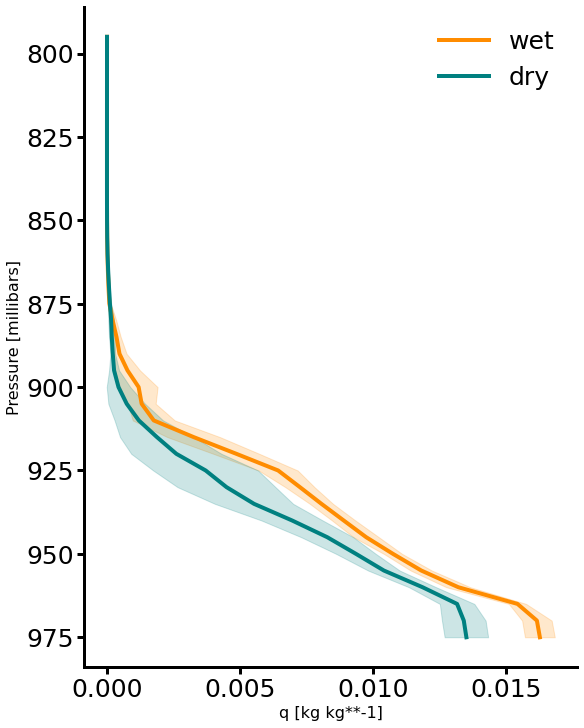

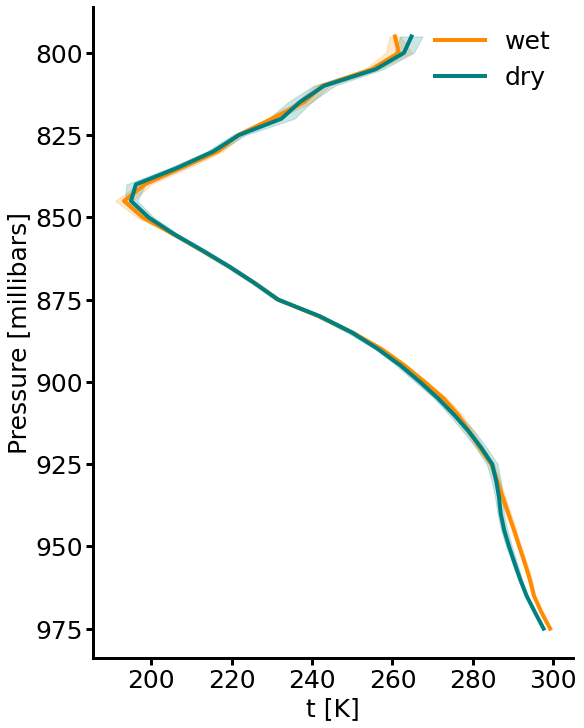

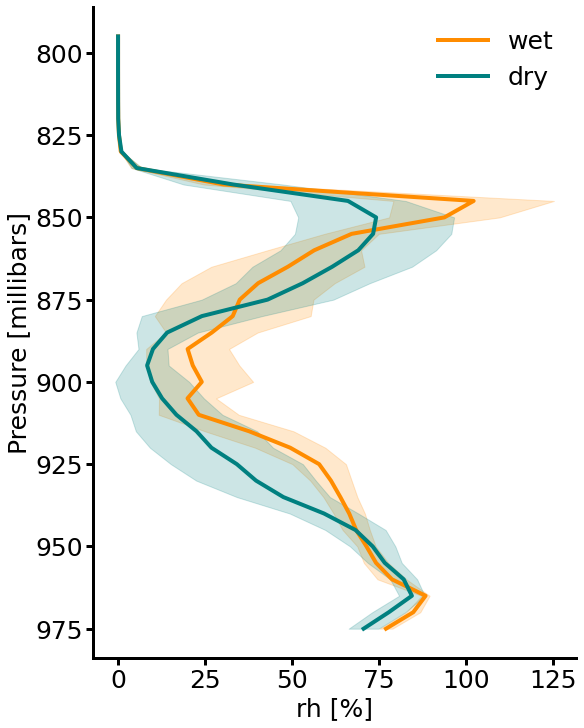

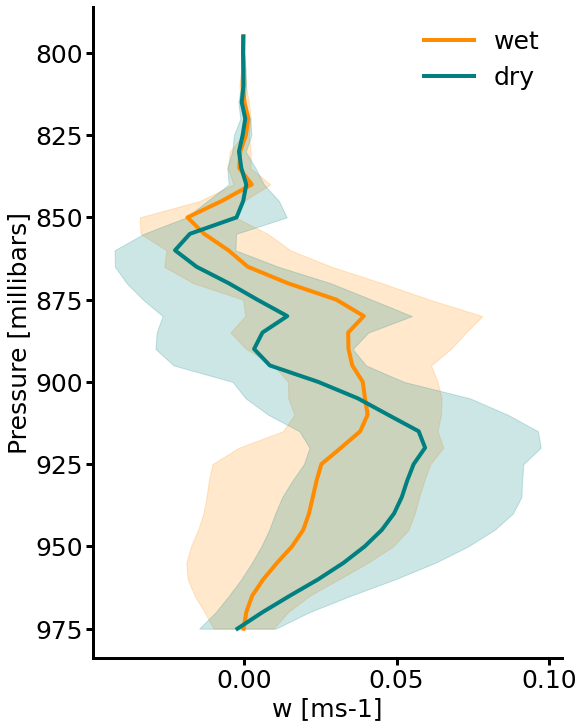

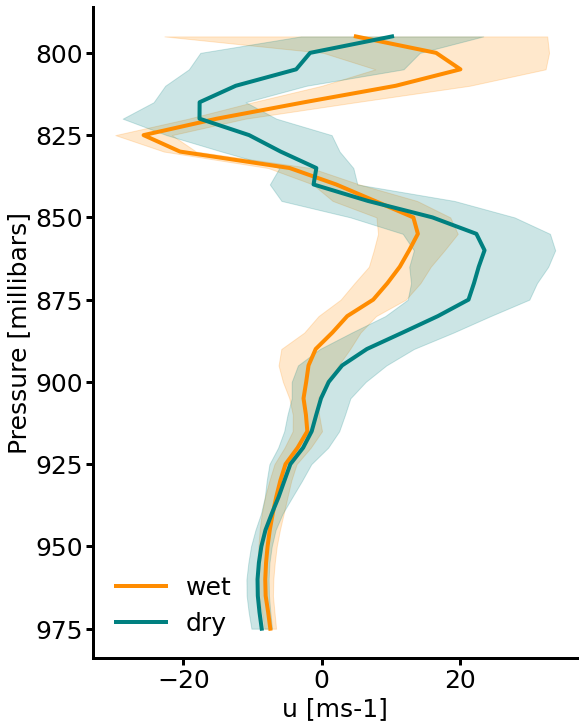

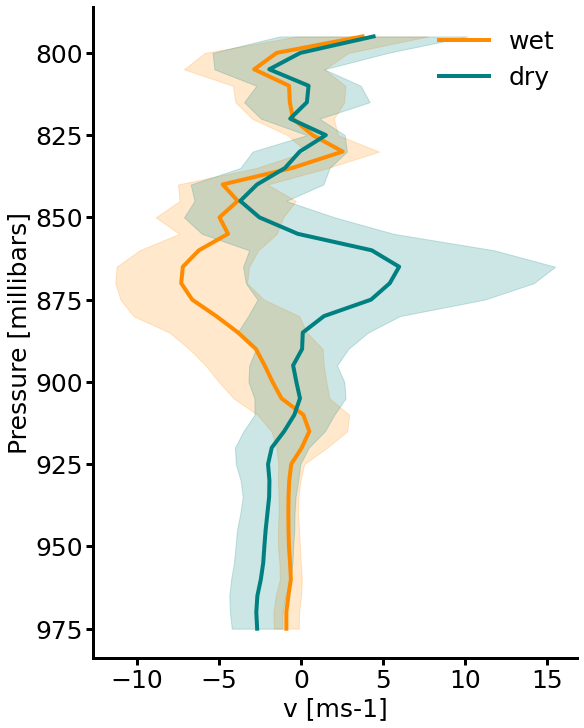

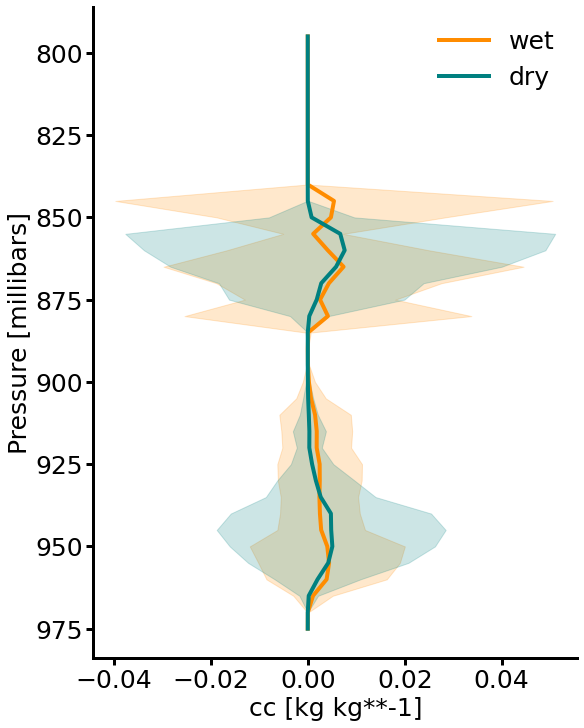

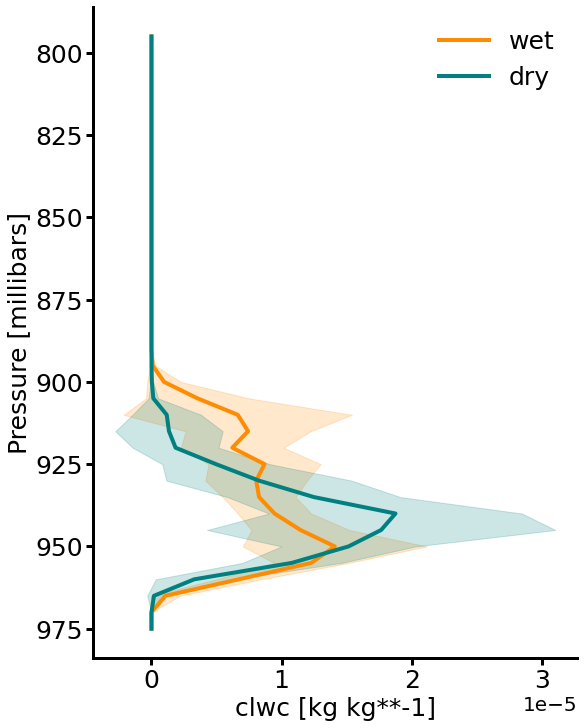

In [11]:
# plotting mean profiles of the variables

def f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, var_name, path_out):    
    
    # reading data from the dictionary for the plot
    mean_dry = np.nanmean(dry_data[var_name].values, axis=0)
    std_dry = np.nanstd(dry_data[var_name].values, axis=0)
    mean_wet = np.nanmean(wet_data[var_name].values, axis=0)
    std_wet = np.nanstd(wet_data[var_name].values, axis=0)
    levels = era5_data.levels.values
    strlev = []
    for ind, lev in enumerate(levels):
        strlev.append(str(lev))
        
    dict_plot_settings = {
        'labelsizeaxes':25,
        'fontSizeTitle':25,
        'fontSizeX'    :25,
        'fontSizeY'    :25,
        'cbarAspect'   :25,
        'fontSizeCbar' :25,
        'rcparams_font':['Tahoma'],
        'savefig_dpi'  :100,
        'font_size'    :25,
        'grid'         :True}    
    fig, axs = plt.subplots(figsize=(8,10), constrained_layout=True)
    # plots settings defined by user at the top
    labelsizeaxes   = dict_plot_settings['labelsizeaxes']
    fontSizeTitle   = dict_plot_settings['fontSizeTitle']
    fontSizeX       = dict_plot_settings['fontSizeX']
    fontSizeY       = dict_plot_settings['fontSizeY']
    cbarAspect      = dict_plot_settings['cbarAspect']
    fontSizeCbar    = dict_plot_settings['fontSizeCbar']
    matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
    plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
    grid = dict_plot_settings['grid']
    matplotlib.rc('xtick', labelsize=20)  # sets dimension of ticks in the plots
    matplotlib.rc('ytick', labelsize=20) # sets dimension of ticks in the plots    fs = 32
    #ax1.set_xlim(binned_sst[0]-1.5, binned_sst[-1]+0.1)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['bottom'].set_linewidth(3)
    axs.spines['left'].set_linewidth(3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    axs.tick_params(which='minor', length=5, width=2)
    axs.tick_params(which='major', length=7, width=3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    axs.tick_params(axis='both', labelsize=dict_plot_settings['labelsizeaxes'])    
    axs.plot(mean_wet, np.arange(len(levels)), 'darkorange', linewidth=4, rasterized=True, label='wet')    
    axs.fill_betweenx(np.arange(len(levels)), mean_wet-std_wet, mean_wet+std_wet, color='darkorange', alpha=0.2)
    axs.plot(mean_dry, np.arange(len(levels)), 'teal', linewidth=4, rasterized=True, label='dry')    
    axs.fill_betweenx(np.arange(len(levels)), mean_dry-std_dry, mean_dry+std_dry, color='teal', alpha=0.2)
    axs.set_ylabel('Pressure ['+era5_data.levels.units+']')
    axs.set_xlabel(var_name+' ['+era5_data[var_name].units+']')

    axs.set_yticklabels(strlev)
    axs.legend(frameon=False)
    fig.savefig(path_out+var_name+'_profiles_mesoscale.png')
    return('plotdone')

plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 'q', path_out)
plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 't', path_out)
plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 'rh', path_out)
plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 'w', path_out)
plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 'u', path_out)
plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 'v', path_out)
plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 'cc', path_out)
plotDone = f_plot_profiles_dry_wet(dry_data, wet_data, era5_data, 'clwc', path_out)